/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:01<00:00, 115MB/s]


Saving cv 8.webp to cv 8.webp


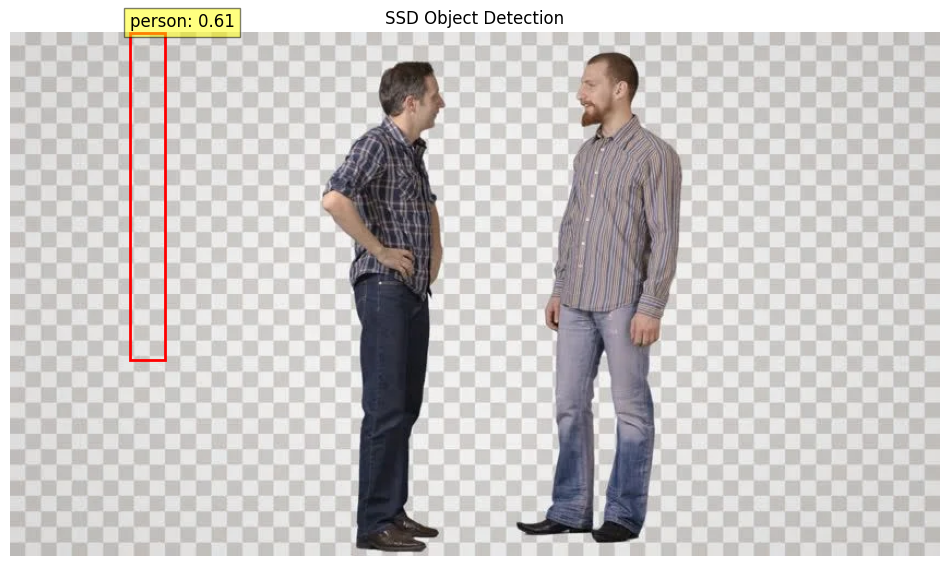

In [1]:
# ✅ Step 2: Import libraries
import torch
import torchvision
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from google.colab import files

# ✅ Step 3: Load the pre-trained SSD model
model = torchvision.models.detection.ssd300_vgg16(pretrained=True).eval()

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# ✅ Step 4: Upload your image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get uploaded filename

# ✅ Step 5: Define preprocessing and load image
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((300, 300)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    return image, transform(image)

original_image, image_tensor = load_image(image_path)
image_tensor = image_tensor.unsqueeze(0).to(device)

# ✅ Step 6: Run inference
with torch.no_grad():
    detections = model(image_tensor)[0]

# ✅ Step 7: Visualize detections
def visualize_detections(image, detections, threshold=0.5):
    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(image)

    # Get category labels
    coco_labels = torchvision.models.detection.SSD300_VGG16_Weights.DEFAULT.meta['categories']

    for i in range(len(detections['boxes'])):
        score = detections['scores'][i].item()
        if score > threshold:
            box = detections['boxes'][i].cpu()
            label = int(detections['labels'][i])
            rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1],
                                     linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            ax.text(box[0], box[1] - 5, f"{coco_labels[label]}: {score:.2f}",
                    bbox=dict(facecolor='yellow', alpha=0.5), fontsize=12)

    plt.axis('off')
    plt.title("SSD Object Detection")
    plt.show()

# ✅ Step 8: Show results
visualize_detections(original_image, detections)